In [3]:
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\kwndn\OneDrive - DePaul University\CSC 521 - Monte Carlo Algorithms\Final Project\CTA_Ridership.csv')
df.drop(columns=['station_id'])
df['year'] = df['date'].str[-4:].astype(int)

In [5]:
df.describe()

,station_id,rides,year
count,1.136863e+06,1.136863e+06,1.136863e+06
mean,4.076634e+04,3.067719e+03,2.011448e+03
std,4.489753e+02,3.124920e+03,6.301486e+00
min,4.001000e+04,0.000000e+00,2.001000e+03
25%,4.037000e+04,9.680000e+02,2.006000e+03
50%,4.076000e+04,2.015000e+03,2.011000e+03
75%,4.115000e+04,4.040000e+03,2.017000e+03
max,4.170000e+04,3.632300e+04,2.022000e+03


In [9]:
df['datetime'] =  pd.to_datetime(df['date'])

In [10]:
df['weekday'] = df['datetime'].apply(lambda x: x.weekday())

In [11]:
df['weekend'] = np.where(df['weekday'] >= 5, 1, 0)

In [14]:
names = df['stationname'].unique()
names.sort()
names

array(['18th', '35-Bronzeville-IIT', '35th/Archer', '43rd',
       '47th-Dan Ryan', '47th-South Elevated', '51st', '54th/Cermak',
       '63rd-Dan Ryan', '69th', '79th', '87th', '95th/Dan Ryan',
       'Adams/Wabash', 'Addison-Brown', 'Addison-North Main',
       "Addison-O'Hare", 'Argyle', 'Armitage', 'Ashland-Lake',
       'Ashland-Orange', 'Ashland/63rd', 'Austin-Forest Park',
       'Austin-Lake', 'Belmont-North Main', "Belmont-O'Hare", 'Berwyn',
       'Bryn Mawr', 'California-Cermak', 'California-Lake',
       'California/Milwaukee', 'Central Park', 'Central-Evanston',
       'Central-Lake', 'Cermak-Chinatown', 'Cermak-McCormick Place',
       'Chicago/Franklin', 'Chicago/Milwaukee', 'Chicago/State',
       'Cicero-Cermak', 'Cicero-Forest Park', 'Cicero-Lake',
       'Clark/Division', 'Clark/Lake', 'Clinton-Forest Park',
       'Clinton-Lake', 'Conservatory', 'Cumberland', 'Damen-Brown',
       'Damen-Cermak', 'Damen/Milwaukee', 'Davis', 'Dempster',
       'Dempster-Skokie', 'Div

In [15]:
blueLine="O'Hare,Rosemont,Cumberland,Harlem,Jefferson Park,Montrose,Irving Park,Addison,Belmont,Logan Square,California,Western,Damen,Division,Chicago,Grand,Clark/Lake,Washington,Monroe,Jackson,LaSalle,Clinton,UIC-Halsted,Racine,Illinois Medical District,Western,Kedzie-Homan,Pulaski,Cicero,Austin,Oak Park,Harlem,Forest Park"
blueLine = blueLine.split(',')
blueLine.sort()
blueLine = ["Addison-O'Hare",
 'Austin-Forest Park',
 "Belmont-O'Hare",
 'California/Milwaukee',
 'Chicago/Milwaukee',
 'Cicero-Forest Park',
 'Clark/Lake',
 'Clinton-Forest Park',
 'Cumberland',
 'Damen/Milwaukee',
 'Division/Milwaukee',
 'Forest Park',
 'Grand/Milwaukee',
 'Harlem-Forest Park',
 'Medical Center',
 "Irving Park-O'Hare",
 'Jackson/Dearborn',
 'Jefferson Park',
 'Kedzie-Homan-Forest Park',
 'LaSalle',
 'Logan Square',
 'Monroe/Dearborn',
 "Montrose-O'Hare",
 "O'Hare Airport",
 'Oak Park-Forest Park',
 'Pulaski-Forest Park',
 'Racine',
 'Rosemont',
 'UIC-Halsted',
 'Washington/Dearborn',
 'Western-Forest Park',
 'Western/Milwaukee']

In [16]:
df.groupby(by='stationname')['rides'].describe()

,count,mean,std,min,25%,50%,75%,max
stationname,,,,,,,,
18th,7975.0,1215.702445,565.417317,0.0,890.5,1152.0,1707.0,3594.0
35-Bronzeville-IIT,7976.0,1650.089644,889.837740,3.0,983.0,1727.0,2128.0,8532.0
35th/Archer,7977.0,2108.934060,951.070682,116.0,1206.0,2346.0,2914.0,4861.0
43rd,7981.0,771.016915,326.318346,0.0,460.0,843.0,1031.0,1936.0
47th-Dan Ryan,7947.0,2412.344910,884.357420,0.0,1741.0,2665.0,3115.0,7387.0
...,...,...,...,...,...,...,...,...
Western-Cermak,7976.0,762.508776,354.004903,0.0,523.0,727.0,1087.0,2044.0
Western-Forest Park,7991.0,1143.640095,470.641596,3.0,774.0,1071.0,1566.0,2583.0
Western-Orange,7977.0,2717.294597,1184.737193,159.0,1542.0,3201.0,3618.0,5735.0


year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rides, dtype: object

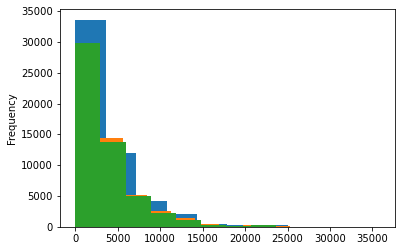

In [20]:
df.query('year > 2015 and year < 2019').groupby(by='year')['rides'].plot.hist()

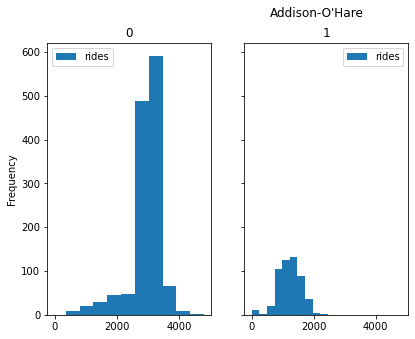

In [21]:
ax = df[df.stationname == "Addison-O'Hare"].query('year >= 2015 and year <= 2019').plot.hist(column=["rides"], by="weekend", title="Addison-O'Hare", figsize=(10, 5), sharex=True, sharey=True, layout=(1,3))

<AxesSubplot:ylabel='Frequency'>

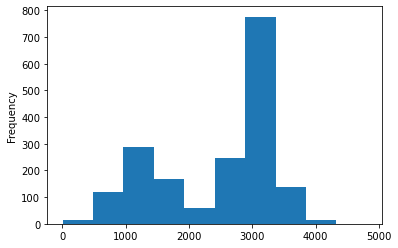

In [22]:
df[df.stationname == "Addison-O'Hare"].query('year >= 2015 and year <= 2019')['rides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

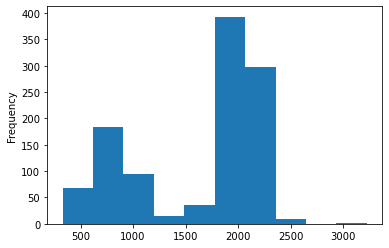

In [23]:
df[df.stationname == "Austin-Forest Park"].query('year > 2015 and year < 2019')['rides'].plot.hist()

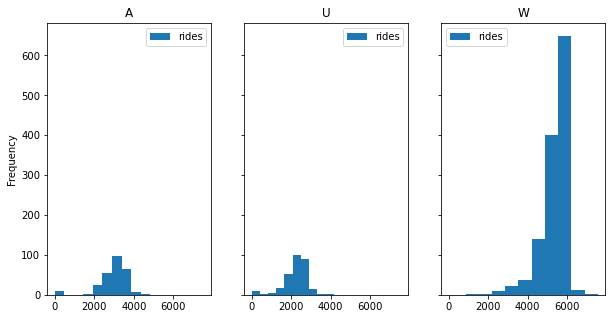

In [24]:
ax = df[df.stationname == "Belmont-O'Hare"].query('year >= 2015 and year <= 2019').plot.hist(column=["rides"], by="daytype", figsize=(10, 5), sharex=True, sharey=True, layout=(1,3))

<AxesSubplot:ylabel='Frequency'>

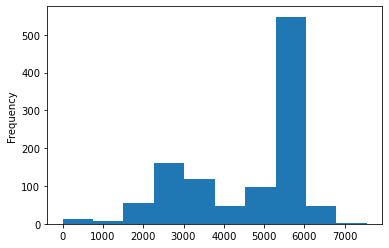

In [25]:
df[df.stationname == "Belmont-O'Hare"].query('year > 2015 and year < 2019')['rides'].plot.hist()

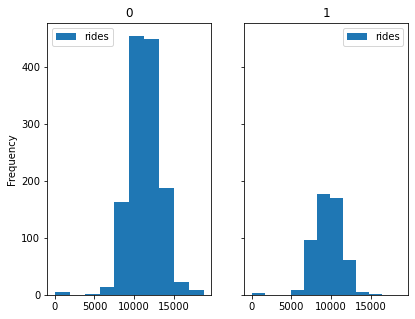

In [26]:
ax = df[df.stationname == "O'Hare Airport"].query('year >= 2015 and year <= 2019').plot.hist(column=["rides"], by="weekend", figsize=(10, 5), sharex=True, sharey=True, layout=(1,3))

<AxesSubplot:ylabel='Frequency'>

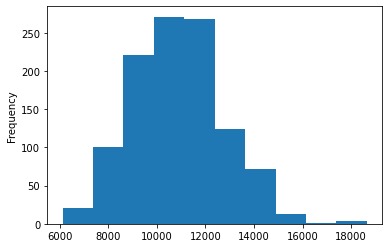

In [27]:
df[df.stationname == "O'Hare Airport"].query('year > 2015 and year < 2019')['rides'].plot.hist()

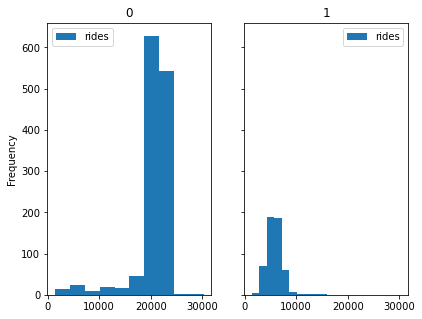

In [28]:
ax = df[df.stationname == "Clark/Lake"].query('year >= 2015 and year <= 2019').plot.hist(column=["rides"], by="weekend", figsize=(10, 5), sharex=True, sharey=True, layout=(1,3))

<AxesSubplot:ylabel='Frequency'>

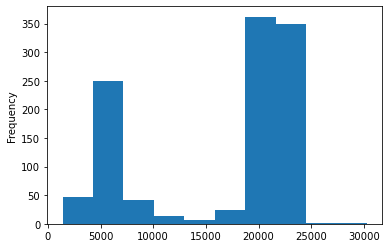

In [29]:
 df[df.stationname == "Clark/Lake"].query('year > 2015 and year < 2019')['rides'].plot.hist()

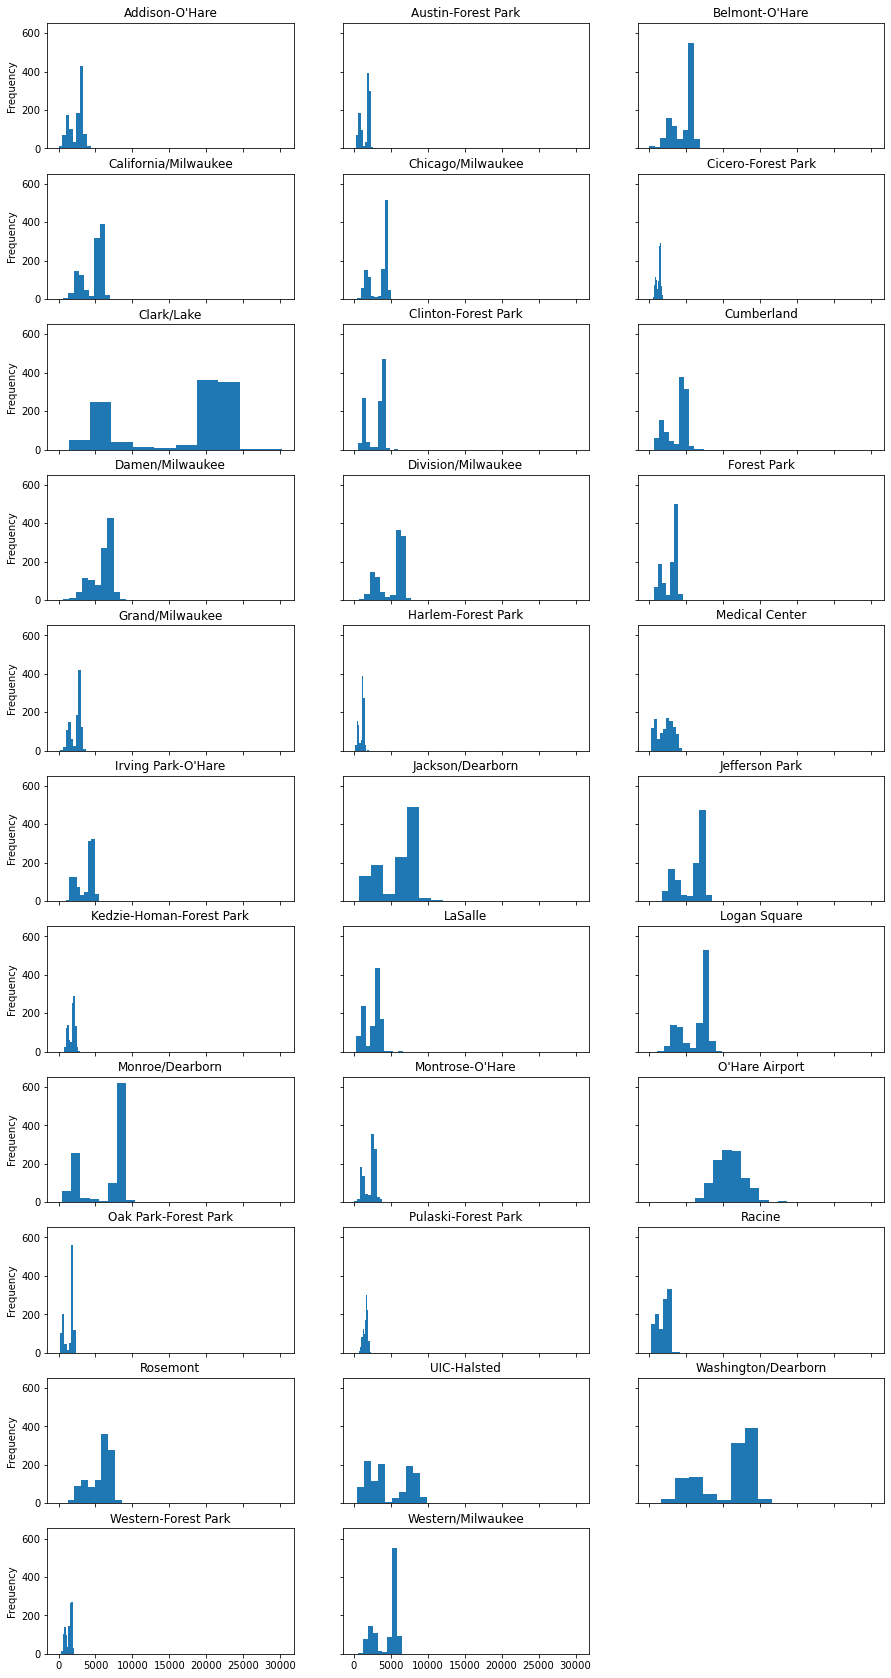

In [30]:
fig, axes = plt.subplots(nrows=11, ncols=3, sharex=True, sharey=True, figsize=(15,30))
axes_list = [item for sublist in axes for item in sublist]

for station in blueLine:
    ax = axes_list.pop(0)
    df[df.stationname == station].query('year > 2015 and year < 2019')['rides'].plot.hist(ax=ax)
    ax.set_title(station)

for ax in axes_list:
    ax.remove()

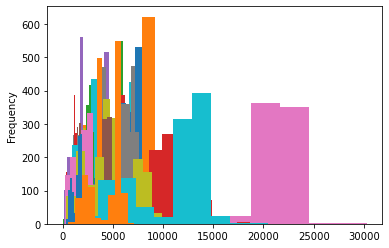

In [31]:
for station in blueLine:
    df[df.stationname == station].query('year > 2015 and year < 2019')['rides'].plot.hist()

In [33]:
# Overall station means + stdev
for station in blueLine:
    print(f"\"{station}\": ({dfSub[dfSub.stationname== station]['rides'].mean():.0f}, {dfSub[dfSub.stationname== station]['rides'].std():.0f})")

"Addison-O'Hare": (2455, 917)
"Austin-Forest Park": (1629, 605)
"Belmont-O'Hare": (4532, 1447)
"California/Milwaukee": (4609, 1421)
"Chicago/Milwaukee": (3469, 1269)
"Cicero-Forest Park": (1220, 307)
"Clark/Lake": (16359, 7331)
"Clinton-Forest Park": (3020, 1196)
"Cumberland": (3750, 1387)
"Damen/Milwaukee": (5865, 1463)
"Division/Milwaukee": (5153, 1749)
"Forest Park": (2854, 998)
"Grand/Milwaukee": (2375, 722)
"Harlem-Forest Park": (1020, 348)
"Medical Center": (2278, 1134)
"Irving Park-O'Hare": (3694, 1130)
"Jackson/Dearborn": (6026, 2466)
"Jefferson Park": (5647, 1807)
"Kedzie-Homan-Forest Park": (1835, 489)
"LaSalle": (2529, 1002)
"Logan Square": (6271, 1859)
"Monroe/Dearborn": (6310, 2868)
"Montrose-O'Hare": (2141, 767)
"O'Hare Airport": (10832, 2082)
"Oak Park-Forest Park": (1466, 621)
"Pulaski-Forest Park": (1615, 297)
"Racine": (1843, 772)
"Rosemont": (5598, 1685)
"UIC-Halsted": (4686, 2737)
"Washington/Dearborn": (10718, 3669)
"Western-Forest Park": (1421, 424)
"Western/Milwa

In [45]:
# Weekday station means + stdev
dfWeekday = dfSub.query('weekend==0')

for station in blueLine:
    print(f'("{station}", {round(dfWeekday[dfWeekday.stationname==station]["rides"].mean())}, {round(dfWeekday[dfWeekday.stationname== station]["rides"].std())}),')

("Addison-O'Hare", 2949, 519),
("Austin-Forest Park", 1966, 320),
("Belmont-O'Hare", 5292, 824),
("California/Milwaukee", 5366, 822),
("Chicago/Milwaukee", 4174, 673),
("Cicero-Forest Park", 1377, 192),
("Clark/Lake", 20578, 3469),
("Clinton-Forest Park", 3704, 580),
("Cumberland", 4499, 739),
("Damen/Milwaukee", 6531, 984),
("Division/Milwaukee", 6084, 1025),
("Forest Park", 3403, 535),
("Grand/Milwaukee", 2755, 426),
("Harlem-Forest Park", 1209, 192),
("Medical Center", 2851, 789),
("Irving Park-O'Hare", 4316, 608),
("Jackson/Dearborn", 7337, 1430),
("Jefferson Park", 6650, 937),
("Kedzie-Homan-Forest Park", 2073, 337),
("LaSalle", 3058, 599),
("Logan Square", 7280, 1015),
("Monroe/Dearborn", 7963, 1349),
("Montrose-O'Hare", 2560, 431),
("O'Hare Airport", 11320, 1990),
("Oak Park-Forest Park", 1818, 309),
("Pulaski-Forest Park", 1754, 206),
("Racine", 2226, 534),
("Rosemont", 6388, 1098),
("UIC-Halsted", 5849, 2357),
("Washington/Dearborn", 12736, 1937),
("Western-Forest Park", 1639,

In [46]:
# Weekday station means + stdev
dfWeekend=0
dfWeekend = dfSub.query('weekend==1')

for station in blueLine:
    print(f'("{station}", {round(dfWeekend[dfWeekend.stationname==station]["rides"].mean())}, {round(dfWeekend[dfWeekend.stationname== station]["rides"].std())}),')

("Addison-O'Hare", 1221, 363),
("Austin-Forest Park", 787, 185),
("Belmont-O'Hare", 2633, 759),
("California/Milwaukee", 2718, 608),
("Chicago/Milwaukee", 1707, 386),
("Cicero-Forest Park", 828, 152),
("Clark/Lake", 5820, 1534),
("Clinton-Forest Park", 1311, 263),
("Cumberland", 1879, 683),
("Damen/Milwaukee", 4203, 1094),
("Division/Milwaukee", 2829, 717),
("Forest Park", 1480, 360),
("Grand/Milwaukee", 1425, 330),
("Harlem-Forest Park", 549, 140),
("Medical Center", 847, 281),
("Irving Park-O'Hare", 2139, 395),
("Jackson/Dearborn", 2750, 1068),
("Jefferson Park", 3141, 651),
("Kedzie-Homan-Forest Park", 1242, 244),
("LaSalle", 1207, 413),
("Logan Square", 3751, 781),
("Monroe/Dearborn", 2182, 592),
("Montrose-O'Hare", 1094, 241),
("O'Hare Airport", 9612, 1785),
("Oak Park-Forest Park", 588, 168),
("Pulaski-Forest Park", 1268, 181),
("Racine", 884, 296),
("Rosemont", 3625, 1213),
("UIC-Halsted", 1781, 718),
("Washington/Dearborn", 5675, 1442),
("Western-Forest Park", 876, 180),
("West